# **Mileage Prediction using Regression Analysis**

-------------

## **Objective**
The objective of the mileage prediction project is to build a machine learning model that accurately predicts the fuel efficiency of a vehicle, measured in miles per gallon (mpg), based on various features of the vehicle. These features typically include attributes like:

Weight

Horsepower

Engine Displacement

Cylinders

Acceleration

Model Year

## **Data Source**

The dataset used is sourced from the StatLib Library, originally used in the 1983 American Statistical Association Exposition. It contains information on city-cycle fuel consumption.

https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

## **Import Data**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')

## **Describe Data**

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [5]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,2
weight,0
acceleration,0
model-year,0


In [35]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,23.517172,5.457071,193.650253,104.189394,2973.000000,15.555808,76.027778
std,7.834368,1.703511,104.422387,38.402030,847.690354,2.758295,3.696969
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.375000,4.000000,104.750000,75.000000,2225.250000,13.800000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,263.250000,125.000000,3610.000000,17.125000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model-year,int64


In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year'],
      dtype='object')

## **Data Visualization**

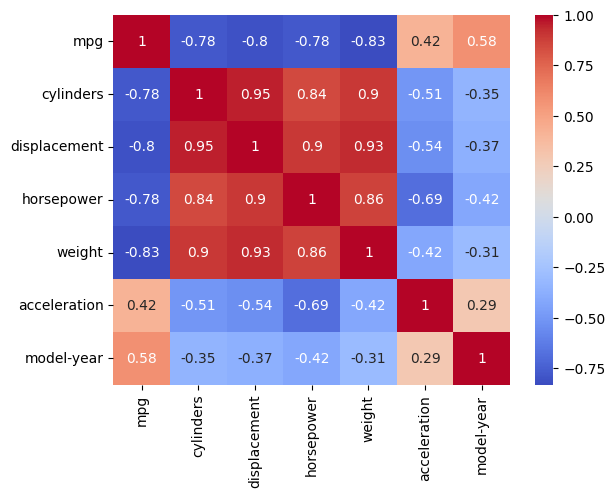

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

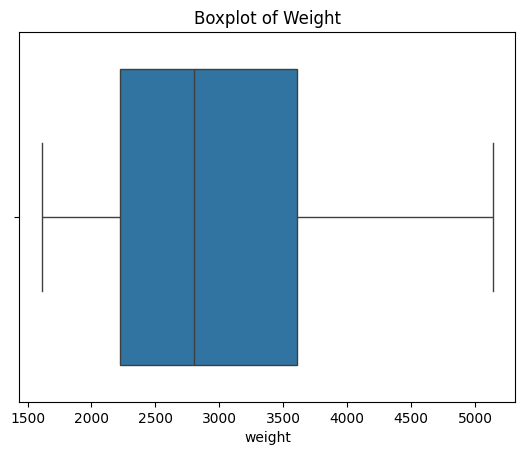

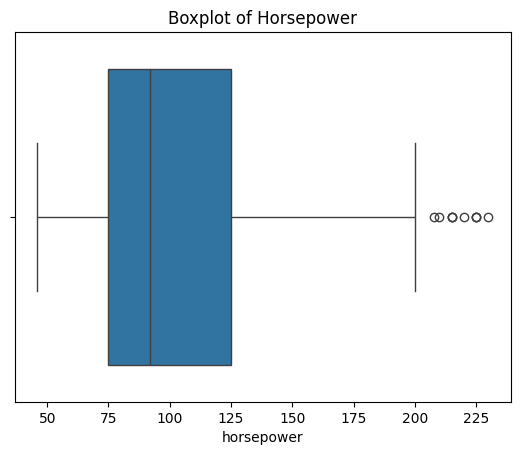

In [31]:
# Boxplot for detecting outliers in 'weight'
sns.boxplot(x=df['weight'])
plt.title('Boxplot of Weight')
plt.show()

# Boxplot for detecting outliers in 'horsepower'
sns.boxplot(x=df['horsepower'])
plt.title('Boxplot of Horsepower')
plt.show()

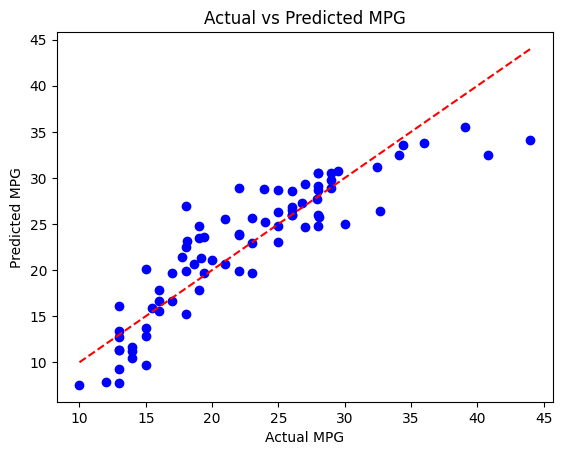

In [34]:
# Scatter plot for predicted vs actual mpg values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()

## **Data Preprocessing**

In [12]:
df.dropna(inplace=True)

In [17]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year']]
y = df['mpg']

## **Define Target Variable (y) and Feature Variables (X)**

In [18]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


## **Train Test Split**

In [19]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [21]:
# Initializing the linear regression model
lr = LinearRegression()

In [22]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

## **Model Evaluation**

In [25]:
# Making predictions on the test set
y_pred = lr.predict(X_test)

In [27]:
# Calculating error metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.5348370632927995
Mean Absolute Percentage Error: 0.1251709419956139
R-squared: 0.7915221520428838


## **Prediction**

In [29]:
# Example prediction
print("Predicted Mileage:", y_pred[:5])


Predicted Mileage: [25.94750773 30.75323514 21.35934614 26.86104935 29.34371694]


## **Explaination**

1.Data Preprocessing: The dataset was cleaned by removing missing values and splitting it into features and the target variable (mpg).

2.Modeling: We used a Linear Regression model for predicting mileage based on several automobile attributes. Polynomial features were also explored for increasing model complexity.

3.Model Evaluation: The model was evaluated using mean absolute error (MAE), mean absolute percentage error (MAPE), and R-squared (R²) to assess its accuracy.